In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [13]:
r = requests.get('https://www.tsa.gov/coronavirus/passenger-throughput')
df = pd.read_html(r.content)[0]
df.head()

,Date,2021 Traveler Throughput,2020 Traveler Throughput,2019 Traveler Throughput
0,10/8/2021,2169783.0,968545,2688032
1,10/7/2021,2063090.0,936915,2605291
2,10/6/2021,1563565.0,668519,2215233
3,10/5/2021,1390201.0,590766,2035628
4,10/4/2021,1842054.0,816838,2400153


<AxesSubplot:xlabel='Date'>

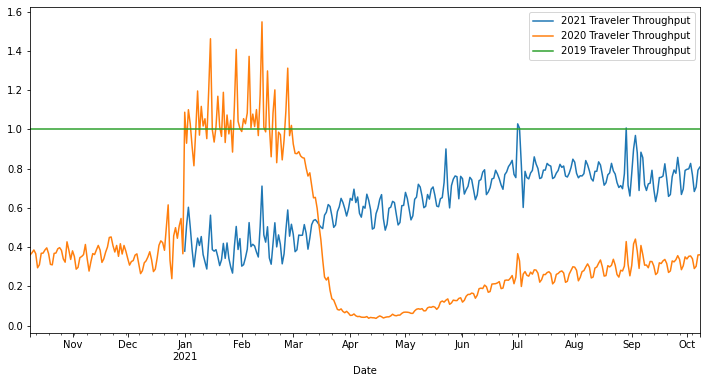

In [16]:
chart = df.copy()
chart['Date'] = pd.to_datetime(chart['Date'])
chart = chart.set_index('Date')
chart = chart.divide(chart[chart.columns[-1]], 0)
chart.plot(figsize=(12, 6))

In [9]:
df.columns = df.columns.str.lower()
df = pd.melt(df, id_vars='date', var_name='year')
df.head()

,date,year,value
0,10/8/2021,2021 traveler throughput,2169783.0
1,10/7/2021,2021 traveler throughput,2063090.0
2,10/6/2021,2021 traveler throughput,1563565.0
3,10/5/2021,2021 traveler throughput,1390201.0
4,10/4/2021,2021 traveler throughput,1842054.0


In [11]:
df['datetime'] = df['date'].str[:-4]
df['year'] = df['year'].str.split(' ').str[0]
df['datetime'] += df['year']
df['datetime'] = pd.to_datetime(df['datetime'])
df

,date,year,value,datetime
0,10/8/2021,2021,2169783.0,2021-10-08
1,10/7/2021,2021,2063090.0,2021-10-07
2,10/6/2021,2021,1563565.0,2021-10-06
3,10/5/2021,2021,1390201.0,2021-10-05
4,10/4/2021,2021,1842054.0,2021-10-04
...,...,...,...,...
1090,10/13/2020,2019,2313632.0,2019-10-13
1091,10/12/2020,2019,2616771.0,2019-10-12
1092,10/11/2020,2019,2555333.0,2019-10-11
1093,10/10/2020,2019,2074718.0,2019-10-10
